This notebook shows how to use the global_biases diagnostic.

The `GlobalBiases` class provides an easy interface to plot 2D biases maps for a given experiment and a variables with respect to some observational data.

Let's plot the global mean temperature for the historical experiment, with a comparison done with the same ERA5 time span and 1990-1999 climatology.

In [1]:
from aqua import Reader
from aqua.diagnostics import GlobalBiases, PlotGlobalBiases

/LUMI_TYKKY_A4O6710/miniconda/envs/env1/lib/python3.12/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


In [7]:
var = '2t'

biases_ifs_nemo = GlobalBiases(model='IFS-NEMO', exp='historical-1990', source='lra-r100-monthly', startdate="1990-01-01", enddate="1999-12-31", loglevel="DEBUG", var=var)
biases_ifs_nemo.retrieve_and_process(var=var)

biases_era5 = GlobalBiases(model='ERA5', exp='era5', source='monthly', startdate="1990-01-01", enddate="1999-12-31", loglevel="DEBUG", var=var)
biases_era5.retrieve_and_process(var=var)


2025-03-07 21:06:10 :: ConfigPath :: DEBUG    -> Updating the log_level to DEBUG
2025-03-07 21:06:10 :: ConfigPath :: DEBUG    -> AQUA installation found in /users/caprioli/.aqua
2025-03-07 21:06:10 :: ConfigPath :: DEBUG    -> Configuration file found in /users/caprioli/.aqua/config-aqua.yaml
2025-03-07 21:06:10 :: ConfigPath :: DEBUG    -> Catalog found in /users/caprioli/.aqua/config-aqua.yaml file are ['obs', 'climatedt-phase1']
2025-03-07 21:06:10 :: ConfigPath :: DEBUG    -> Available catalogs are ['obs', 'climatedt-phase1']
2025-03-07 21:06:10 :: ConfigPath :: DEBUG    -> Default catalog will be obs
2025-03-07 21:06:10 :: ConfigPath :: DEBUG    -> Catalog file is /users/caprioli/.aqua/catalogs/obs/catalog.yaml
2025-03-07 21:06:10 :: ConfigPath :: DEBUG    -> Machine file is /users/caprioli/.aqua/catalogs/obs/machine.yaml
2025-03-07 21:06:10 :: ConfigPath :: DEBUG    -> Machine found in configuration file, set to lumi
2025-03-07 21:06:10 :: ConfigPath :: DEBUG    -> Machine found

In [11]:
plot_biases = PlotGlobalBiases(data = biases_ifs_nemo.data, data_ref=biases_era5.data, var=var,
                               model='IFS-NEMO', exp='historical-1990', model_ref='ERA5', loglevel='DEBUG')

2025-03-07 21:06:33 :: Global Biases :: INFO     -> Plotting global biases.
2025-03-07 21:06:33 :: Global Biases :: INFO     -> Plotting bias map between two datasets.


(<Figure size 1100x850 with 2 Axes>,
 <GeoAxes: title={'center': '2t global bias of IFS-NEMO historical-1990 1990-01-01/1999-12-01\nrelative to ERA5 climatology 1990-01-01/1999-12-01'}, xlabel='Longitude', ylabel='Latitude'>,
 <xarray.DataArray '2t' (lat: 180, lon: 360)> Size: 518kB
 dask.array<sub, shape=(180, 360), dtype=float64, chunksize=(180, 360), chunktype=numpy.ndarray>
 Coordinates:
   * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
   * lon      (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
 Attributes: (12/27)
     GRIB_paramId:                    167
     long_name:                       2 metre temperature
     GRIB_stepUnits:                  1
     GRIB_gridDefinitionDescription:  150
     GRIB_typeOfLevel:                heightAboveGround
     standard_name:                   air_temperature
     ...                              ...
     shortName:                       2t
     AQUA_model:                      IFS-NEMO
  

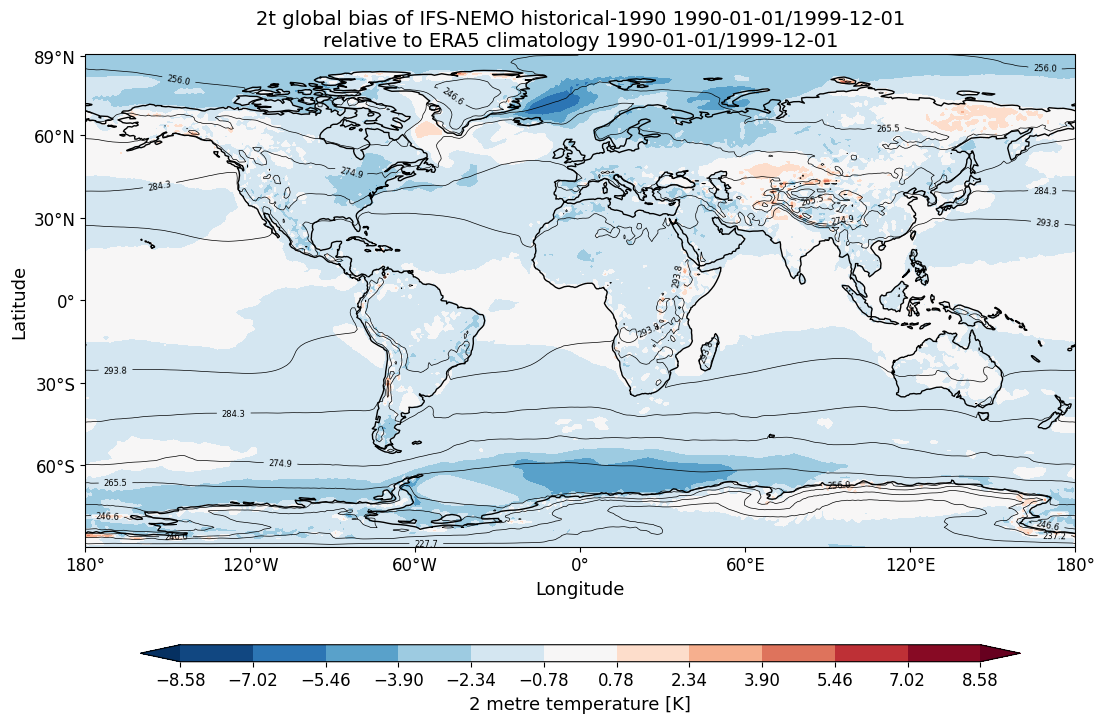

In [12]:
plot_biases.plot_bias()  #check why I need to specify plev again, probably little bug

2025-03-07 21:07:01 :: Global Biases :: INFO     -> Plotting seasonal biases.
/LUMI_TYKKY_A4O6710/miniconda/envs/env1/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'add_colorbar', 'add_labels'
  result = super().contourf(*args, **kwargs)
/LUMI_TYKKY_A4O6710/miniconda/envs/env1/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'add_colorbar', 'add_labels'
  result = super().contourf(*args, **kwargs)
/LUMI_TYKKY_A4O6710/miniconda/envs/env1/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'add_colorbar', 'add_labels'
  result = super().contourf(*args, **kwargs)
/LUMI_TYKKY_A4O6710/miniconda/envs/env1/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'add_colorbar', 'add_labels'
  result = super().contourf(*args, **kw

(<Figure size 1100x850 with 5 Axes>,
 array([<GeoAxes: title={'center': 'DJF'}, xlabel='Longitude [deg]', ylabel='Latitude [deg]'>,
        <GeoAxes: title={'center': 'MAM'}, xlabel='Longitude [deg]', ylabel='Latitude [deg]'>,
        <GeoAxes: title={'center': 'JJA'}, xlabel='Longitude [deg]', ylabel='Latitude [deg]'>,
        <GeoAxes: title={'center': 'SON'}, xlabel='Longitude [deg]', ylabel='Latitude [deg]'>],
       dtype=object),
 <xarray.Dataset> Size: 2MB
 Dimensions:  (lat: 180, lon: 360)
 Coordinates:
   * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
   * lon      (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
 Data variables:
     DJF      (lat, lon) float64 518kB 0.03623 -0.00898 ... -3.777 -3.776
     MAM      (lat, lon) float64 518kB -3.185 -2.979 -2.984 ... -2.062 -2.062
     JJA      (lat, lon) float64 518kB -2.036 -1.781 -1.79 ... -0.2783 -0.2781
     SON      (lat, lon) float64 518kB -0.917 -0.9132 -0.9155 ... -4.989 -4

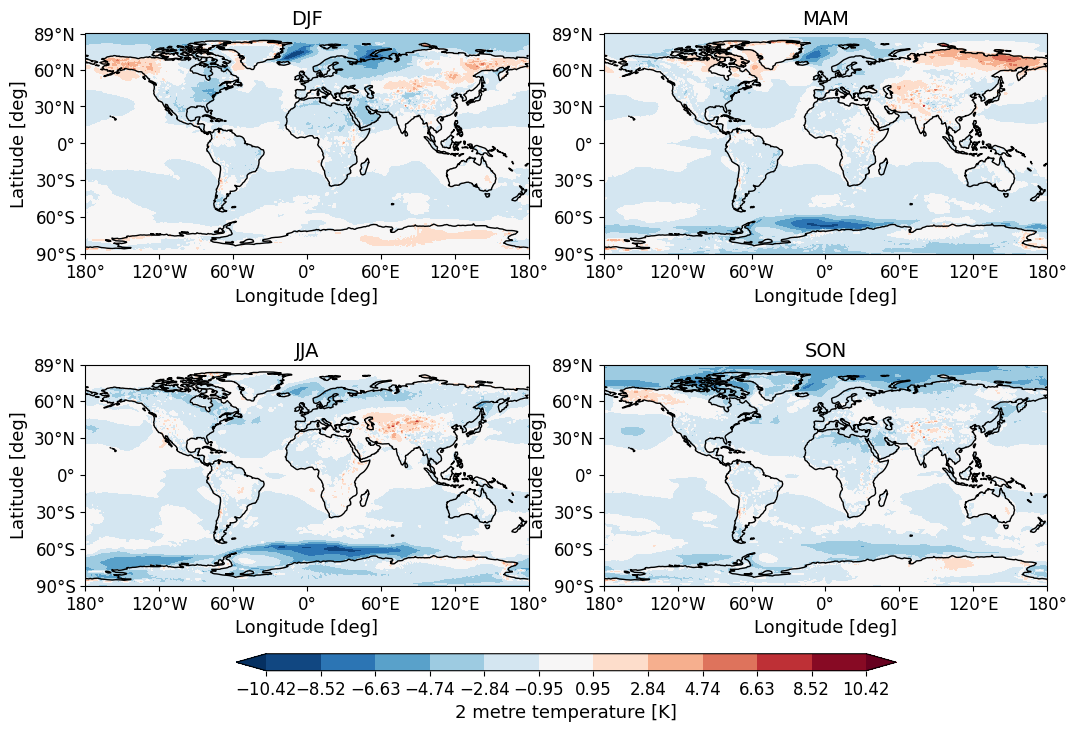

In [13]:
plot_biases.plot_seasonal_bias()

We can also plot the vertical bias profile as a function of pressure levels:

In [ ]:
plot_biases.plot_vertical_bias(vmin= -0.002, vmax= 0.002)

KeyError: "No variable named 'q'. Variables on the dataset include ['2t', 'time', 'lat', 'lon']"